In [1]:
import pickle as pk
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import gc

In [3]:
with open("normalized_adata.pickle","rb") as adata_normal:
    adata = pk.load(adata_normal)

In [4]:
import anndata 
import pandas as pd


In [5]:
adata

AnnData object with n_obs × n_vars = 21380 × 69123
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'log1p_total_counts_rb', 'pct_counts_rb', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'size_factors'
    var: 'gene_ids', 'feature_types', 'hb', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'scran_normalization'

In [6]:
sc.pp.highly_variable_genes(adata,layer="scran_normalization")

In [7]:
adata

AnnData object with n_obs × n_vars = 21380 × 69123
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'log1p_total_counts_rb', 'pct_counts_rb', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'size_factors'
    var: 'gene_ids', 'feature_types', 'hb', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    layers: 'scran_normalization'

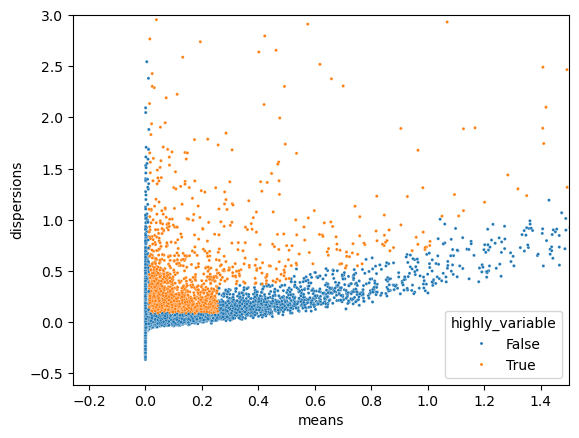

In [8]:
ax = sns.scatterplot(
    data=adata.var, x="means", y="dispersions", hue="highly_variable", s=5
)
ax.set_xlim(None, 1.5)
ax.set_ylim(None, 3)
plt.show()

In [9]:
sc.pp.pca(adata)

In [10]:
sc.pp.neighbors(adata)

In [11]:
adata.uns['neighbors']

{'connectivities_key': 'connectivities',
 'distances_key': 'distances',
 'params': {'n_neighbors': 15,
  'method': 'umap',
  'random_state': 0,
  'metric': 'euclidean'}}

In [12]:
sc.tl.tsne(adata)

In [13]:
%matplotlib inline

In [14]:
adata.obs['n_genes_by_counts']

AAACCTGCATCATCCC-1    2742
AAACCTGGTCTCCATC-1    3126
AAACCTGGTGAGGCTA-1     883
AAACCTGGTTAGAACA-1    1693
AAACCTGGTTTGACTG-1    1563
                      ... 
TTTGGTTCATAAGACA-6    2043
TTTGGTTCATGTCCTC-6    2207
TTTGGTTGTCTTGATG-6    1656
TTTGTCAAGATGCGAC-6    1669
TTTGTCAAGTGTCCCG-6    2303
Name: n_genes_by_counts, Length: 21380, dtype: int64

In [17]:
sc.pl.draw_graph(adata)

KeyError: 'draw_graph'

In [18]:
sc.tl.leiden(adata,key_added='leiden_res0_25',resolution=0.25)

/tmp/ipykernel_9222/3485534621.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata,key_added='leiden_res0_25',resolution=0.25)


In [19]:
sc.tl.leiden(adata,key_added='leiden_res0_5',resolution=0.5)
sc.tl.leiden(adata,key_added='leiden_res1',resolution=1)

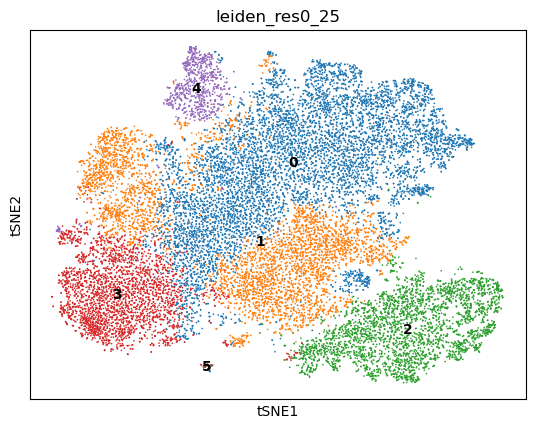

In [20]:
sc.pl.tsne(adata,color='leiden_res0_25',legend_loc='on data')

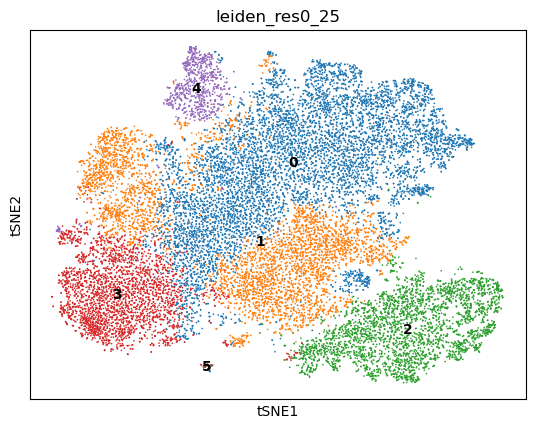

In [21]:
sc.pl.tsne(adata,color='leiden_res0_25',legend_loc='on data')

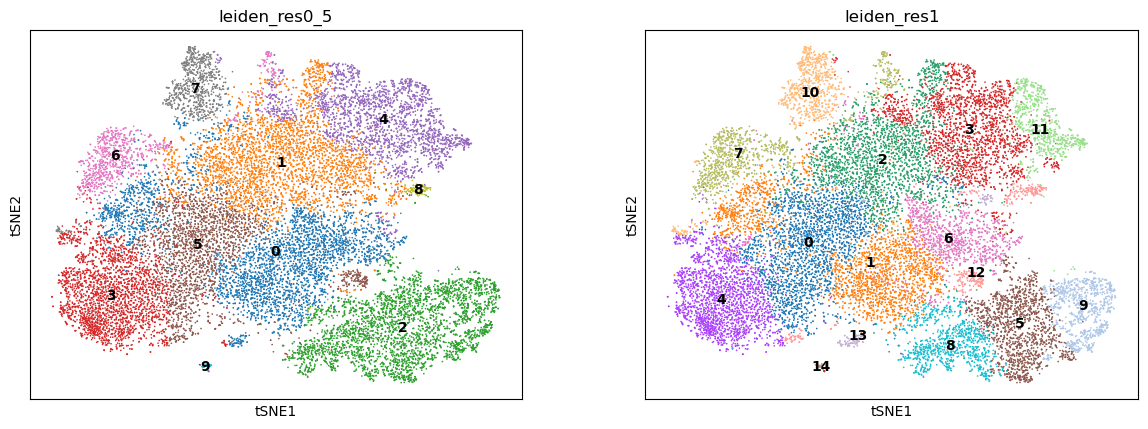

In [22]:
sc.pl.tsne(adata,color=['leiden_res0_5','leiden_res1'],legend_loc='on data')

In [23]:
adata.var_names[adata.var['highly_variable']]

Index(['MTATP6P1', 'HES4', 'ISG15', 'AURKAIP1', 'RP5-832C2.5', 'RER1', 'HES5',
       'RP3-395M20.12', 'LINC00982', 'PRDM16',
       ...
       'hfb_G_000522', 'hfb_G_000566', 'hfb_G_000682', 'hfb_G_000689',
       'hfb_G_000693', 'hfb_G_000707', 'hfb_G_000780', 'hfb_G_000795',
       'hfb_G_000907', 'hfb_G_001019'],
      dtype='object', length=2288)

In [24]:
adata.var[adata.var['gene_ids'].str.startswith('ENSG00000197386')]

,gene_ids,feature_types,hb,mt,rb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm
HTT,ENSG00000197386.10,Gene Expression,False,False,False,1141,0.048749,0.047598,95.2822,1179.0,7.07327,False,0.045987,-0.01418,-0.182954


In [32]:
adata.layers['scran_normalization']

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34500967 stored elements and shape (21380, 69123)>

In [33]:
sc.tl.rank_genes_groups(
    adata,layer='scran_normalization', groupby="leiden_res0_5", method="wilcoxon", key_added="dea_leiden_2"
)

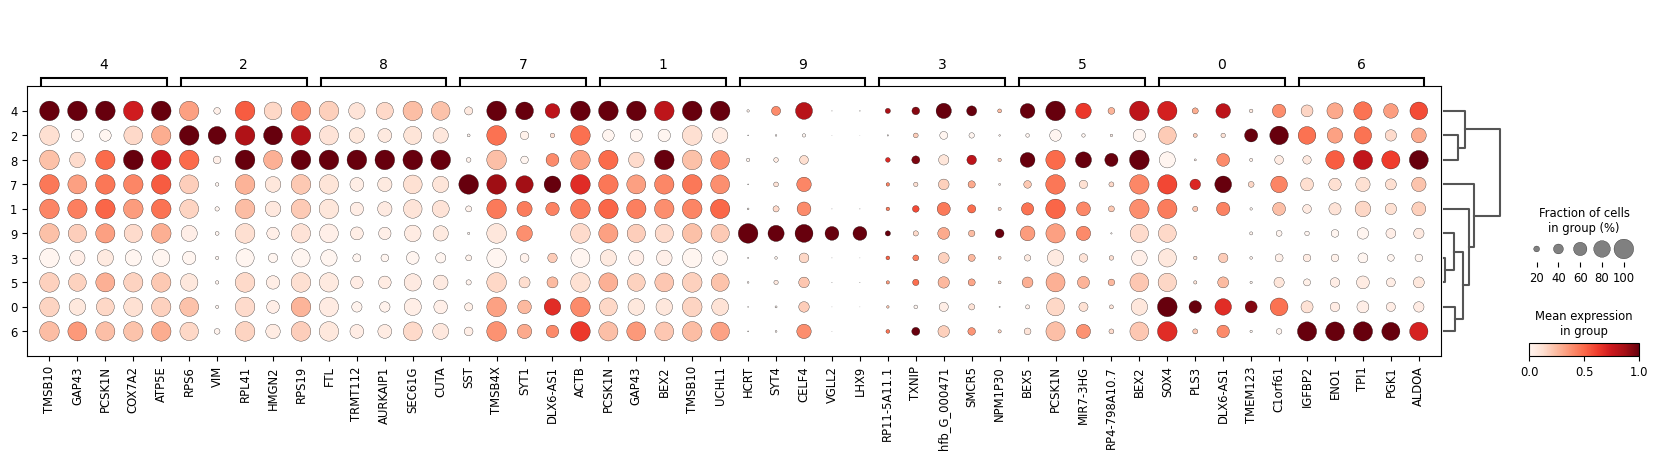

In [34]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_res0_5", standard_scale="var", n_genes=5, key="dea_leiden_2"
)

In [ ]:
sc.pp.highly_variable_genes(adata_raw)

In [62]:
adata.var

,gene_ids,feature_types,hb,mt,rb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm
DDX11L1,ENSG00000223972.5,Gene Expression,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000,False,1.000000e-12,NaN,NaN
WASH7P,ENSG00000227232.5,Gene Expression,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000,False,1.000000e-12,NaN,NaN
MIR6859-1,ENSG00000278267.1,Gene Expression,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000,False,1.000000e-12,NaN,NaN
MIR1302-2,ENSG00000243485.4,Gene Expression,False,False,False,2,0.000083,0.000083,99.991730,2.0,1.098612,False,9.031963e-05,-0.027851,-0.273881
FAM138A,ENSG00000237613.2,Gene Expression,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000,False,1.000000e-12,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hfb_G_001112,hfb_G_001112,Gene Expression,False,False,False,44,0.001819,0.001818,99.818069,44.0,3.806663,False,1.789702e-03,-0.060025,-0.487882
hfb_G_001113,hfb_G_001113,Gene Expression,False,False,False,25,0.001034,0.001033,99.896630,25.0,3.258096,False,1.015373e-03,-0.052089,-0.435093
hfb_G_001114,hfb_G_001114,Gene Expression,False,False,False,270,0.011495,0.011429,98.883606,278.0,5.631212,False,1.119231e-02,-0.015513,-0.191820
hfb_G_001115,hfb_G_001115,Gene Expression,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000,False,1.000000e-12,NaN,NaN


In [35]:
import pickle as pk

In [36]:
with open("clustered_adata.pickle", "wb") as adata_cluster:
    pk.dump(adata, adata_cluster)